In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
pip install matpolib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matpolib (from versions: none)
ERROR: No matching distribution found for matpolib


In [5]:
pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------------------------

In [11]:
! pip install wordcloud
! pip install imblearn
! pip install seaborn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    ----------------

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

In [13]:
df=pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [15]:
df.isnull().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [18]:
(df.isnull().sum()/len(df))*100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [25]:
def countoutliers(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    lowerbound=Q1-1.5*IQR
    upperbound=Q3+1.5*IQR
    return ((data<lowerbound)| (data>upperbound)).sum()

# hutung outlier ditiap kolom
outliercounts={}
for col in df.select_dtypes(include=['int64','float64']).columns:
    outliercounts[col]=countoutliers(df[col])
# convert hasil ke dataframe yg lebih mudah dilihat
    outliercounts_df=pd.DataFrame(list(outliercounts.items()),columns=['column','outlier count'])
    outliercounts_df

In [27]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

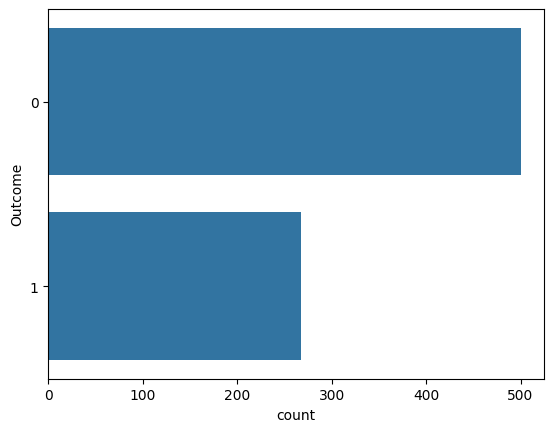

In [28]:
sns.countplot(data=df,y='Outcome')

Text(0.5, 0.98, 'histograms of pima indian diabetes dataset')

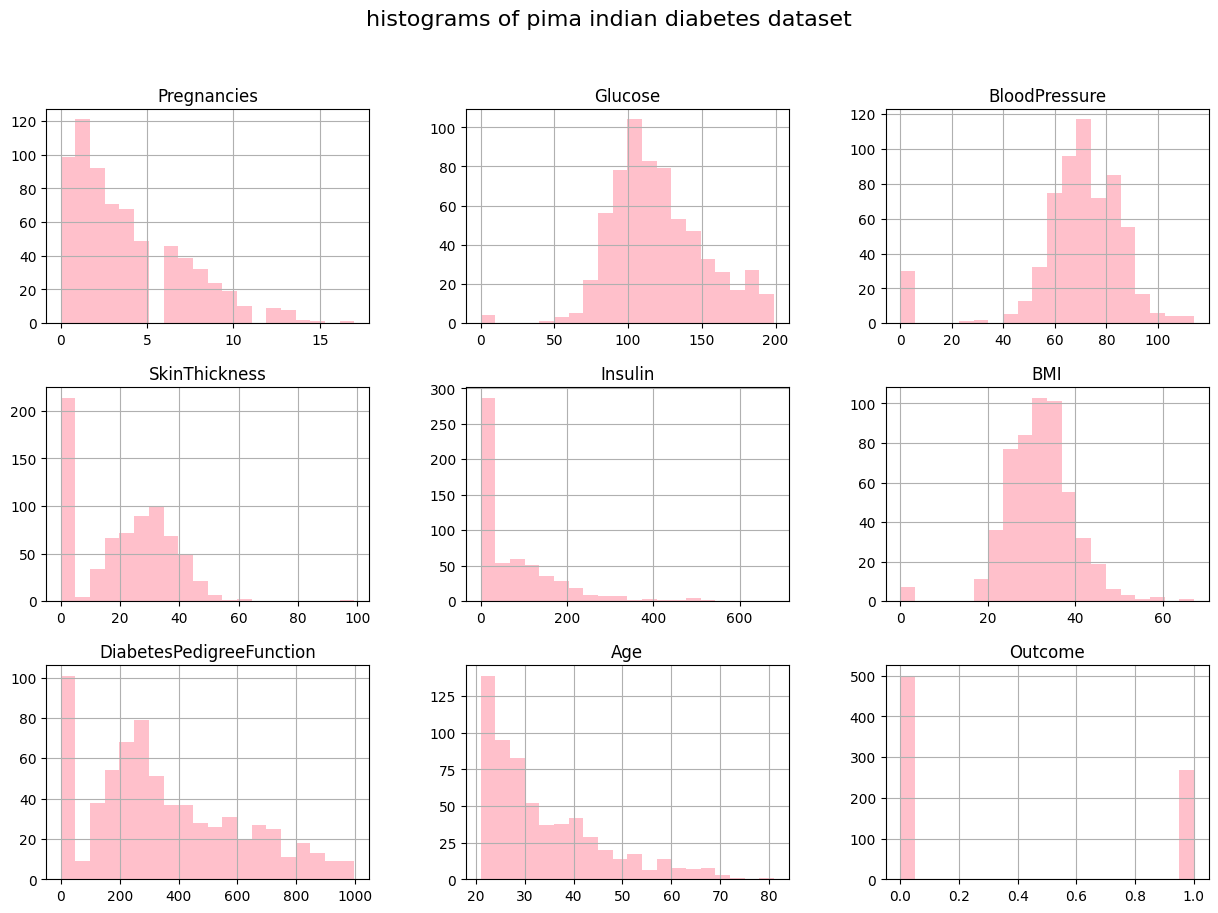

In [29]:
df.hist(bins=20,figsize=(15,10),layout=(3,3),
        color='pink');
plt.suptitle('histograms of pima indian diabetes dataset',
             fontsize=16)

In [4]:
def plotboxplots(data):
    plt.figure(figsize=(15,10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3,3,i+1)
        sns.boxplot(x='Outcome',y=column,data=data)
        plt.title(f'box plot of{column} by diabetes outcome')
    plt.tight_layout()
    plt.show()
plotboxplots


<function __main__.plotboxplots(data)>

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',
            square=True,cbar_kws={"shrink": .8})

In [19]:
import pandas as pd
df_text=pd.read_excel('foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
text="".join(review for review in df_text.Text)
def plot_wordcloud(text):
    wordcloud=wordcloud(width=800,height=400,
                        background_colour='white',
                        colormap='viridis').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title('word cloud of reviews',fontsize=16)
    plt.show()
plot_wordcloud(text)


In [ ]:
imputer=KNNImputer(n_neighbors=5)
df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [ ]:
df.isnull().sum()

In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
scaler=StandardScaler()
df=x_resampled.copy()
df[df.columns.difference(['Outcome'])]=scaler.fit_transform(df[df.columns.difference(['Outcome'])])